#  Profit Prediction Model of 50 Startup Companies Using Data Science

## Author- Samrat Mukherjee

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Loading the Given Data

In [2]:
#load data
f=pd.read_csv('50_Startups.csv')

In [3]:
f.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
f.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
print(f.shape)
f.info()

(50, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [6]:
#checking whether null is present in dataset or not
f.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

# Visualization

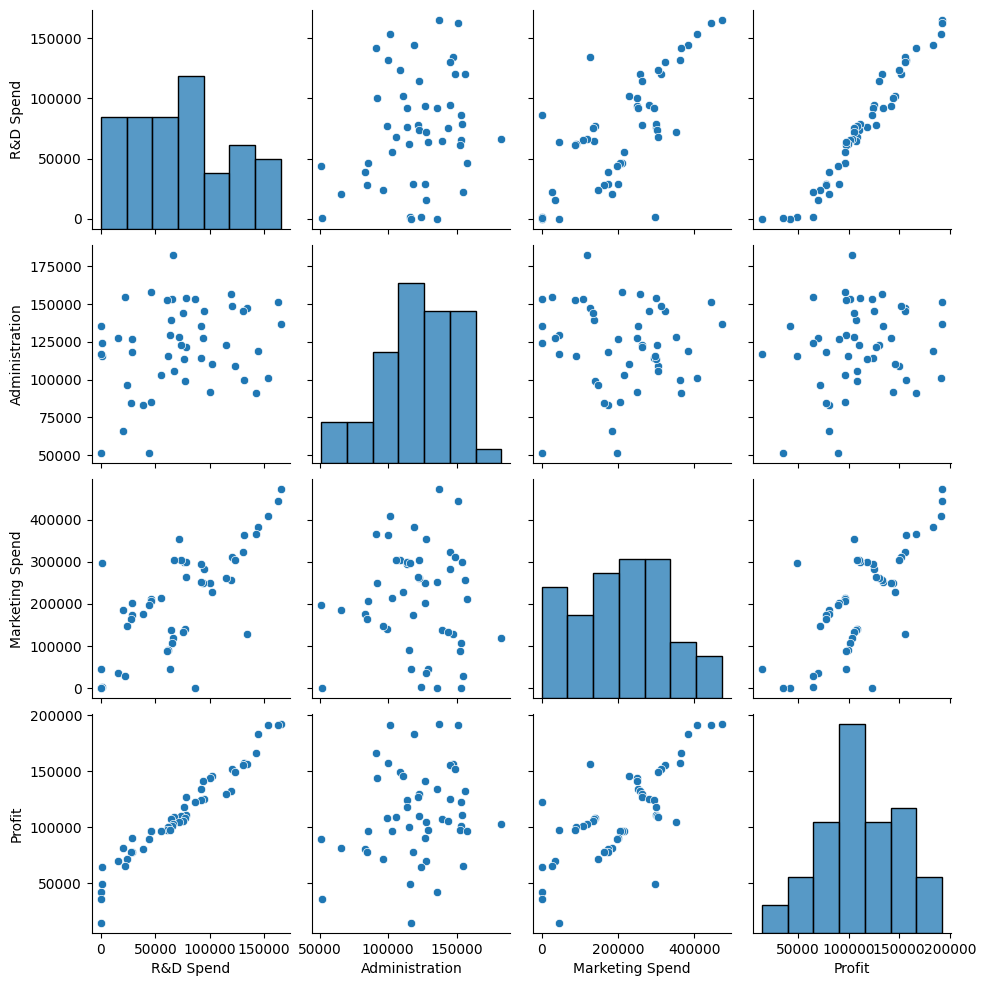

In [7]:
#pairwise relationship for the given dataset
sns.pairplot(f)

<Axes: >

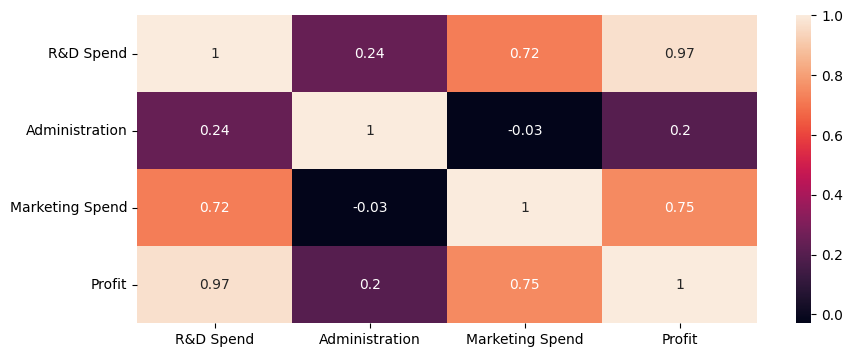

In [8]:
correlation_matrix=f.corr().round(2)
fig,ax=plt.subplots(figsize=(10,4))
sns.heatmap(data=correlation_matrix,annot=True)

**Since we have to predict the Profit, the Profit is a dependeble variable and the rest i.e R&D Spend,Administration,	Marketing Spend	are independent variables**

## Outlier Detection and Removal

<Axes: >

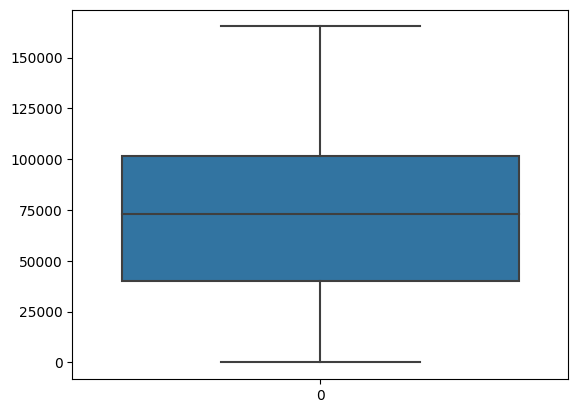

In [9]:
sns.boxplot(f['R&D Spend'])

<Axes: >

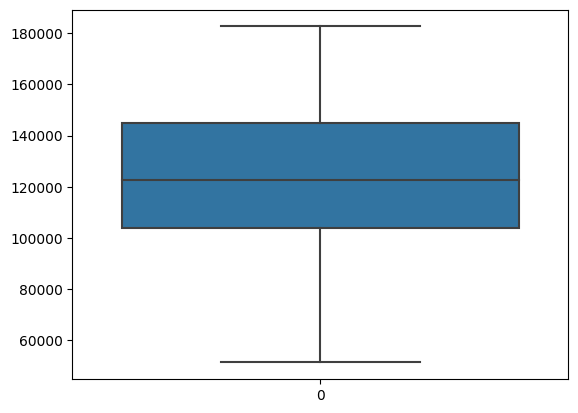

In [10]:
sns.boxplot(f['Administration'])

<Axes: >

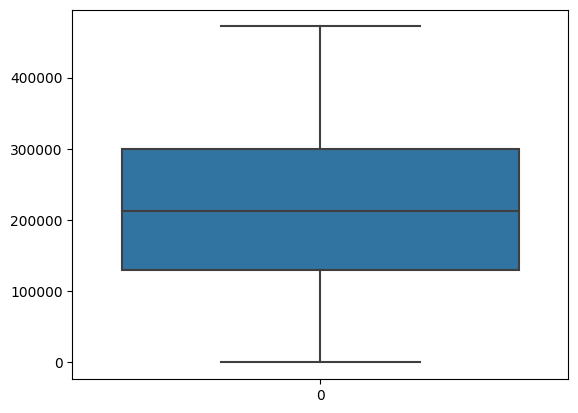

In [11]:
sns.boxplot(f['Marketing Spend'])

In [12]:
pd.DataFrame(f['R&D Spend']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.05,0.0))

,R&D Spend
count,50.000000
mean,73721.615600
std,45902.256482
min,0.000000
0%,0.000000
5%,748.231000
10%,14086.703000
30%,46302.455000
50%,73051.080000
75%,101602.800000


***No Outliers Found***

# Model Building

In [13]:
Dependent_Variable = 'Profit'

In [14]:
#creating a list of independent variable
Indepentdent_Variables= f.columns.tolist()
Indepentdent_Variables.remove(Dependent_Variable)

In [15]:
Indepentdent_Variables

['R&D Spend', 'Administration', 'Marketing Spend']

# Splitting of data into test and train data

In [16]:
x = f[Indepentdent_Variables].values
y = f[Dependent_Variable].values

In [17]:
#splitting test data = 20% and train data = 80%
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test =train_test_split(x,y,train_size=0.8,random_state=0)

# Model No.1- The linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [19]:
# Dataframe Comparing Actual vs Predicted
lin_pred=lin_model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': lin_pred})  
df 

,Actual,Predicted
0,103282.38,103901.896970
1,144259.40,132763.059931
2,146121.95,133567.903700
3,77798.83,72911.789767
4,191050.39,179627.925672
5,105008.31,115166.648648
6,81229.06,67113.576906
7,97483.56,98154.806868
8,110352.25,114756.115552
9,166187.94,169064.014088


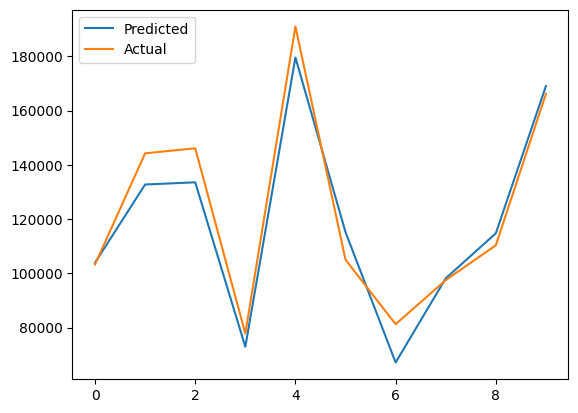

In [20]:
# Visualization of Actual vs Predicted
plt.plot(lin_pred, label='Predicted')
plt.plot(y_test,label='Actual')
plt.legend(loc="upper left")
plt.show()

# Evaluation Metrics

In [21]:
math.sqrt(mean_squared_error(y_test,lin_pred))

8803.775790469346

In [22]:
 print('Mean Absolute Error:', metrics.mean_absolute_error(lin_pred,y_test)) 

Mean Absolute Error: 7320.44161484813


In [23]:
#This is the value of R^2
np.round(metrics.r2_score(lin_pred, y_test),2)

0.94

# Accuracy Function for regression

In [24]:
def evaluate(model, test_features, test_labels, y_pred):
    errors = abs(y_pred - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [25]:
Accuracy=[]

In [26]:
Accuracy_lin_model = evaluate(lin_model,x_test,y_test,lin_pred)
Accuracy.append(Accuracy_lin_model)

Model Performance
Average Error: 7320.4416 degrees.
Accuracy = 93.71%.


# Model No.2- The Cross decomposition(PLS Regression) Model 

In [27]:
from sklearn.cross_decomposition import PLSRegression
PLS_model=PLSRegression()
PLS_model.fit(x_train,y_train)

PLSRegression()

In [28]:
# Dataframe Comparing Actual vs Predicted
PLS_pred=PLS_model.predict(x_test)
PLS_pred

array([[ 96637.84009914],
       [134800.09107021],
       [133307.55384223],
       [ 77638.90443139],
       [183107.36361272],
       [120612.70749741],
       [ 74623.30402798],
       [ 92354.64224465],
       [118522.92434004],
       [172515.35637493]])

In [29]:
PLS_pred = np.reshape(PLS_pred, (1,np.product(PLS_pred.shape)))[0]
PLS_pred

array([ 96637.84009914, 134800.09107021, 133307.55384223,  77638.90443139,
       183107.36361272, 120612.70749741,  74623.30402798,  92354.64224465,
       118522.92434004, 172515.35637493])

In [30]:
PLS_model_df = pd.DataFrame({'Actual': y_test, 'Predicted': PLS_pred})  
PLS_model_df

,Actual,Predicted
0,103282.38,96637.840099
1,144259.40,134800.091070
2,146121.95,133307.553842
3,77798.83,77638.904431
4,191050.39,183107.363613
5,105008.31,120612.707497
6,81229.06,74623.304028
7,97483.56,92354.642245
8,110352.25,118522.924340
9,166187.94,172515.356375


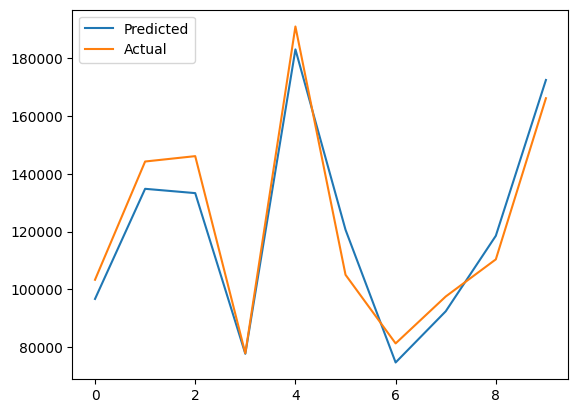

In [31]:
# Visualization of Actual vs Predicted
plt.plot(PLS_pred, label='Predicted')
plt.plot(y_test,label='Actual')
plt.legend(loc="upper left")
plt.show()

# Evaluation Metrics 


In [32]:
math.sqrt(mean_squared_error(y_test,PLS_pred))

8838.49295355912

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(PLS_pred,y_test)) 


Mean Absolute Error: 7885.835888406045


In [34]:
#This is the value of R^2
np.round(metrics.r2_score(PLS_pred, y_test),2)

0.94

In [35]:
Accuracy_PLS_model = evaluate(PLS_model,x_test,y_test,PLS_pred)
Accuracy.append(Accuracy_PLS_model)

Model Performance
Average Error: 7885.8359 degrees.
Accuracy = 93.44%.


# Model No.3-Decision Trees Regressor Model


In [36]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()
tree_model_df = tree_model.fit(x_train,y_train)
tree_model_df

DecisionTreeRegressor()

In [37]:
tree_model_pred=tree_model.predict(x_test)
tree_model_df = pd.DataFrame({'Actual': y_test, 'Predicted':tree_model_pred})  
tree_model_df 

,Actual,Predicted
0,103282.38,101004.64
1,144259.40,141585.52
2,146121.95,141585.52
3,77798.83,78239.91
4,191050.39,182901.99
5,105008.31,108733.99
6,81229.06,71498.49
7,97483.56,99937.59
8,110352.25,108733.99
9,166187.94,182901.99


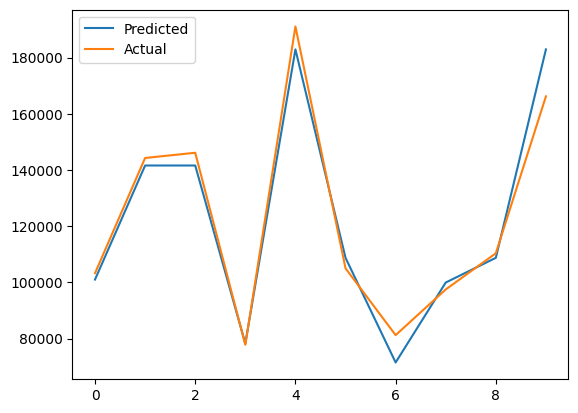

In [38]:
# Visualization of Actual vs Predicted
plt.plot(tree_model_pred, label='Predicted')
plt.plot(y_test,label='Actual')
plt.legend(loc="upper left")
plt.show()

# Evaluation Metrics


In [39]:
math.sqrt(mean_squared_error(y_test,tree_model_pred))

7043.245594834814

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(tree_model_pred,y_test)) 

Mean Absolute Error: 5232.012000000004


In [41]:
#This is the value of R^2
np.round(metrics.r2_score(tree_model_pred, y_test),2)


0.96

In [42]:
Accuracy_tree_model = evaluate(tree_model,x_test,y_test,tree_model_pred)
Accuracy.append(Accuracy_tree_model)

Model Performance
Average Error: 5232.0120 degrees.
Accuracy = 95.84%.


# Model No.4-Neural network model (supervised)

In [43]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor()
mlp_df = mlp_model.fit(x_train,y_train)
mlp_df

MLPRegressor()

In [44]:
mlp_pred=mlp_model.predict(x_test)
mlp_df = pd.DataFrame({'Actual': y_test, 'Predicted':mlp_pred})  
mlp_df 

,Actual,Predicted
0,103282.38,114477.435262
1,144259.40,117104.203083
2,146121.95,119116.316822
3,77798.83,82654.344487
4,191050.39,173928.119939
5,105008.31,159868.174400
6,81229.06,82185.362562
7,97483.56,94178.969625
8,110352.25,142594.519223
9,166187.94,156609.090665


In [45]:
mlp_df.to_csv("mlp.csv")

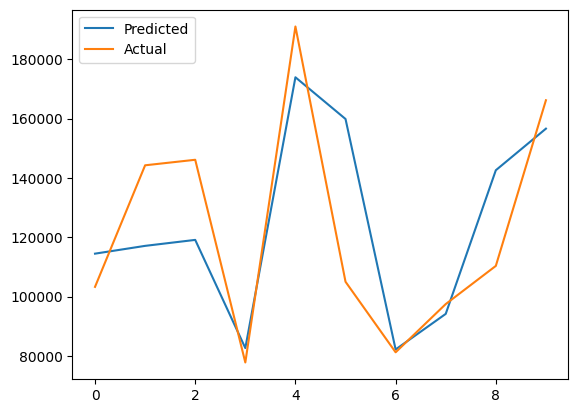

In [46]:
# Visualization of Actual vs Predicted
plt.plot(mlp_pred, label='Predicted')
plt.plot(y_test,label='Actual')
plt.legend(loc="upper left")
plt.show()

# Evaluation Metrics


In [47]:
math.sqrt(mean_squared_error(y_test,mlp_pred))

24620.203475199232

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(mlp_pred,y_test)) 

Mean Absolute Error: 18827.55458004173


In [49]:
#This is the value of R^2
np.round(metrics.r2_score(mlp_pred, y_test),2)

0.37

In [50]:
Accuracy_mlp_model = evaluate(mlp_model,x_test,y_test,mlp_pred)
Accuracy.append(Accuracy_mlp_model)

Model Performance
Average Error: 18827.5546 degrees.
Accuracy = 84.49%.


# Model No.5-Ensemble methods (GradientBoostingRegressor)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_model = GradientBoostingRegressor()
GBR_df = GBR_model.fit(x_train,y_train)
GBR_df

GradientBoostingRegressor()

In [52]:
GBR_pred=GBR_model.predict(x_test)
GBR_df = pd.DataFrame({'Actual': y_test, 'Predicted':GBR_pred})  
GBR_df 

,Actual,Predicted
0,103282.38,101417.605679
1,144259.40,132908.434128
2,146121.95,133882.693832
3,77798.83,82100.180043
4,191050.39,182248.279508
5,105008.31,113293.801655
6,81229.06,58725.089325
7,97483.56,97321.439060
8,110352.25,111735.677525
9,166187.94,172389.401422


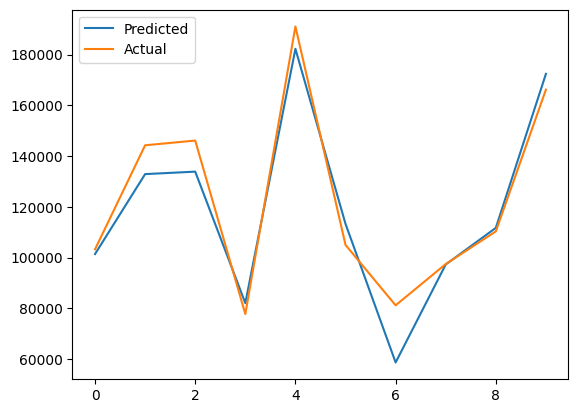

In [53]:
# Visualization of Actual vs Predicted
plt.plot(GBR_pred, label='Predicted')
plt.plot(y_test,label='Actual')
plt.legend(loc="upper left")
plt.show()

# Evaluation Metrics


In [54]:
math.sqrt(mean_squared_error(y_test,GBR_pred))

9967.829799631776

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(GBR_pred,y_test)) 

Mean Absolute Error: 7709.492911402328


In [56]:
#This is the value of R^2
np.round(metrics.r2_score(GBR_pred, y_test),2)

0.92

In [57]:
Accuracy_GBR_model = evaluate(GBR_model,x_test,y_test,GBR_pred)
Accuracy.append(Accuracy_GBR_model)

Model Performance
Average Error: 7709.4929 degrees.
Accuracy = 93.11%.


# Best Model Selection

In [58]:
Models =['lin_model','PLS_model','tree_model','mlp_model','GBR_model']

In [59]:
Acc_df = pd.DataFrame({"Models": Models,
                   "Accuracy": Accuracy})

In [60]:
Acc_df

,Models,Accuracy
0,lin_model,93.711792
1,PLS_model,93.441141
2,tree_model,95.843627
3,mlp_model,84.486000
4,GBR_model,93.106776


<Axes: xlabel='Models', ylabel='Accuracy'>

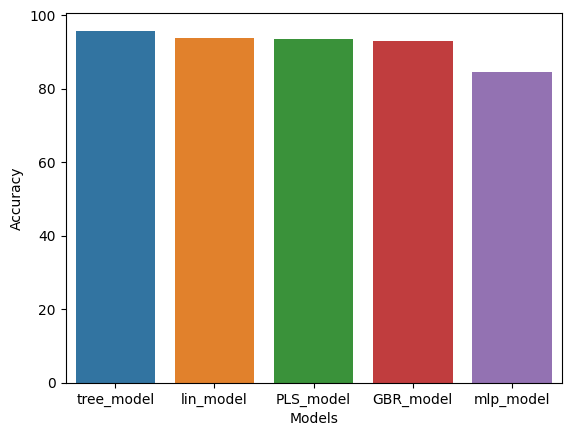

In [61]:
sns.barplot(x='Models',y="Accuracy", data=Acc_df,order=Acc_df.sort_values('Accuracy',ascending = False).Models)

#  Improve Version of the Model No.3

# Previous Model and Accuracy

In [62]:
tree_model = tree.DecisionTreeRegressor()
tree_model_df = tree_model.fit(x_train,y_train)
tree_model_df

DecisionTreeRegressor()

# Evaluation Metrics


In [63]:
math.sqrt(mean_squared_error(y_test,tree_model_pred))

7043.245594834814

In [64]:
#This is the value of R^2
np.round(metrics.r2_score(tree_model_pred, y_test),2)

0.96

In [65]:
Base_Accuracy = evaluate(tree_model,x_test,y_test,tree_model_pred)

Model Performance
Average Error: 5232.0120 degrees.
Accuracy = 95.84%.


In [66]:
Model_Accuracy=[]
Model_Accuracy.append(Base_Accuracy)

# Hyperparameter tuning 

### RandomizedSearchCV 

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Looking at parameters using current forest
print('Parameters currently in use:\n')
pprint(tree_model.get_params())


Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [68]:
#criterion = ['squared_error', 'friedman_mse','absolute_error', 'poisson']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
random_state=[int(x) for x in np.arange(1000)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
grid = { #'criterion': criterion,
               'random_state':random_state,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'random_state': [0,
                  1,
                  2,
                  3,
                  4,
                  5,
                  6,
                  7,
                  8,
                  9,
                  10,
                  11,
                  12,
                  13,
                  14,
                  15,
                  16,
                  17,
                  18,
                  19,
                  20,
                  21,
                  22,
                  23,
                  24,
                  25,
                  26,
                  27,
                  28,
                  29,
                  30,
                  31,
                  32,
                  33,
                  34,
                  35,
                  36,
                  37,
                  38,
                  39,


In [69]:
rf_random = RandomizedSearchCV(tree_model, param_distributions = grid, n_iter = 10000, cv = 3, verbose=2, n_jobs = -1)
rf_random.fit(x,y)

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=10000,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]},
                   verbose=2)

In [70]:
rf_random.best_params_

{'random_state': 516,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 70}

In [71]:
tree_model = tree.DecisionTreeRegressor(criterion = 'squared_error',min_samples_split = 2, min_samples_leaf= 1,max_depth= 70,random_state=516)
tree_model_df = tree_model.fit(x_train,y_train)

In [72]:
hyper_random_tree_model_pred=tree_model.predict(x_test)
tree_model_df = pd.DataFrame({'Actual': y_test, 'Predicted':tree_model_pred})  
tree_model_df 

,Actual,Predicted
0,103282.38,101004.64
1,144259.40,141585.52
2,146121.95,141585.52
3,77798.83,78239.91
4,191050.39,182901.99
5,105008.31,108733.99
6,81229.06,71498.49
7,97483.56,99937.59
8,110352.25,108733.99
9,166187.94,182901.99


In [73]:
np.round(metrics.r2_score(tree_model_pred, y_test),2)

0.96

In [74]:
Accuracy_RSV = evaluate(tree_model,x_test,y_test,hyper_random_tree_model_pred)

Model Performance
Average Error: 4240.4580 degrees.
Accuracy = 96.54%.


In [75]:
print('Improvement of {:0.2f}%.'.format( 100 * (Accuracy_RSV - Base_Accuracy) / Base_Accuracy))


Improvement of 0.73%.


In [76]:
Model_Accuracy.append(Accuracy_RSV)

### GridSearchCV 

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
tree_model = tree.DecisionTreeRegressor()

In [79]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
random_state=[int(x) for x in np.arange(1000)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
grid = { #'criterion': criterion,
               'random_state':random_state,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'random_state': [0,
                  1,
                  2,
                  3,
                  4,
                  5,
                  6,
                  7,
                  8,
                  9,
                  10,
                  11,
                  12,
                  13,
                  14,
                  15,
                  16,
                  17,
                  18,
                  19,
                  20,
                  21,
                  22,
                  23,
                  24,
                  25,
                  26,
                  27,
                  28,
                  29,
                  30,
                  31,
                  32,
                  33,
                  34,
                  35,
                  36,
                  37,
                  38,
                  39,


In [80]:
tuning_model=GridSearchCV(tree_model,param_grid = grid ,cv = 3, verbose = 2, n_jobs = -1)
tuning_model.fit(x, y)

Fitting 3 folds for each of 72000 candidates, totalling 216000 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             verbose=2)

In [81]:
tuning_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 513}

In [82]:
tuned_hyper_model= tree.DecisionTreeRegressor(criterion = 'squared_error',max_depth=10,min_samples_split= 2 ,min_samples_leaf=1,random_state=513)

In [83]:
tuned_hyper_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=513)

In [84]:
grid_tuned_pred=tuned_hyper_model.predict(x_test)

In [85]:
np.round(metrics.r2_score(grid_tuned_pred, y_test),2)

0.97

In [86]:
Accuracy_GSV = evaluate(tuned_hyper_model,x_test,y_test,grid_tuned_pred)

Model Performance
Average Error: 4480.2890 degrees.
Accuracy = 96.30%.


In [87]:
print('Improvement of {:0.2f}%.'.format( 100 * (Accuracy_GSV - Base_Accuracy) / Base_Accuracy))

Improvement of 0.47%.


In [88]:
Model_Accuracy.append(Accuracy_GSV)

# Accuracy Before vs After Hyperparameter Tuning

In [89]:
B_Accuracy=[]
B_Accuracy.append(Base_Accuracy)
model=['Base_model','Rscv_Model','Gscv_Model']
Improvement=[np.round((float(x) - B_Accuracy[0]),2) for x in Model_Accuracy ]

In [90]:
df = pd.DataFrame({"Models": model,
                   "Accuracy": Model_Accuracy,
                   "Improvement":Improvement})

In [91]:
df

,Models,Accuracy,Improvement
0,Base_model,95.843627,0.00
1,Rscv_Model,96.541982,0.70
2,Gscv_Model,96.295960,0.45


#  Final Model

In [101]:
Profit_Prediction_Model = tree.DecisionTreeRegressor(criterion = 'squared_error',
                                                     min_samples_split = 2, 
                                                     min_samples_leaf= 1,
                                                     max_depth= 70,
                                                     random_state=516)

In [102]:
Profit_Prediction_Model_df = Profit_Prediction_Model.fit(x_train,y_train)
Profit_Prediction_Model_df

DecisionTreeRegressor(max_depth=70, random_state=516)

In [103]:
Final_pred = Profit_Prediction_Model.predict(x_test)

In [104]:
Profit_Prediction_Model_df = pd.DataFrame({'Actual': y_test, 'Predicted':Final_pred})  
Profit_Prediction_Model_df 

,Actual,Predicted
0,103282.38,101004.64
1,144259.40,141585.52
2,146121.95,141585.52
3,77798.83,78239.91
4,191050.39,182901.99
5,105008.31,108733.99
6,81229.06,71498.49
7,97483.56,97427.84
8,110352.25,108733.99
9,166187.94,156991.12


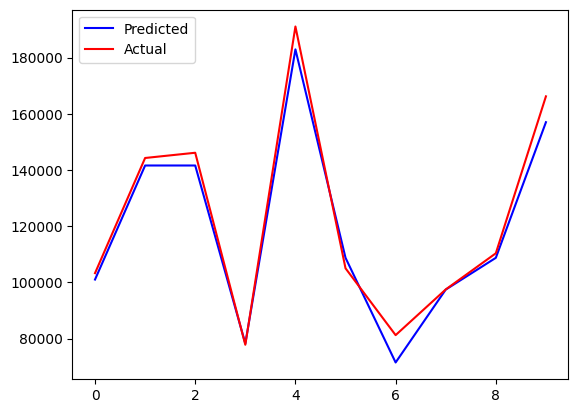

In [105]:
# Visualization of Actual vs Predicted
plt.plot(Final_pred, label='Predicted',color='b')
plt.plot(y_test,label='Actual',color='r')
plt.legend(loc="upper left")
plt.show()

# Evaluation Metrics

In [106]:
math.sqrt(mean_squared_error(y_test,Final_pred))

5433.930044442978

In [107]:
#This is the value of R^2
np.round(metrics.r2_score(Final_pred, y_test),2)

0.97

In [108]:
Final_Accuracy = evaluate(tree_model,x_test,y_test,Final_pred)

Model Performance
Average Error: 4240.4580 degrees.
Accuracy = 96.54%.


In [109]:
from joblib import dump, load
dump(Profit_Prediction_Model_df, 'Profit_Prediction_Model.joblib') 

['Profit_Prediction_Model.joblib']